##Importiung the required libraries

In [330]:
#basic libraries
import math
import nltk
import re
import csv
import random
import pandas as pd
import wordcloud
import sklearn
import numpy as np

#for pre-processing
from csv import writer
from urllib import request
from random import shuffle
import re, string
from nltk.tokenize import word_tokenize
from nltk import word_tokenize
from nltk.stem.isri import ISRIStemmer
from gensim.parsing.preprocessing import remove_stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.tokenize import regexp_tokenize
from nltk.corpus import gutenberg, stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

#Machine Learning methods
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

#For Model Evaluation


#For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from yellowbrick.text import TSNEVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

import math
import pandas as pd
import numpy as np
from numpy import concatenate
import re
from urllib import request
from pprint import pprint

# Sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import ShuffleSplit
from sklearn import preprocessing
from sklearn.metrics import silhouette_score ,silhouette_samples
import matplotlib.cm as cm
from sklearn.utils import shuffle
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.decomposition  import PCA
from sklearn.metrics import cohen_kappa_score
from sklearn.manifold import TSNE
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.metrics.pairwise import euclidean_distances

import scipy.cluster.hierarchy as shc
from scipy.sparse import csr_matrix

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Ginsim
import gensim
import gensim.corpora as corpora
import gensim.utils as simple_preprocess
from gensim.models import CoherenceModel
from gensim.models import Word2Vec
import gensim.downloader as api
import spacy
import scipy


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [331]:
import nltk
nltk.download("stopwords")
print(stopwords.words('english'))
nltk.download("wordnet")
nltk.download('punkt')
nltk.download('gutenberg')


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

# 1 - Prepare the Data and Text Preprocessing

In [211]:
def read_book(book, index, Author, label):
    toknize_book = regexp_tokenize(book, r'(\w{2,})[\s]')

    #stop_words = set(stopwords.words('english'))


    toknize_book = [word for word in toknize_book if word.lower()]

    list_of_part = []
    for i in range(200):
        start = random.randint(0, len(toknize_book) - 100)
        list_of_part.append(' '.join(toknize_book[start:start+150]))

    df = pd.DataFrame({"index": index, "Authors": Author, "label": label, "partitions": list_of_part})
    return df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [212]:

url1 = "https://www.gutenberg.org/cache/epub/21077/pg21077.txt"           #The Mind and the Brain by Alfred Binet
url2 = "https://www.gutenberg.org/cache/epub/5827/pg5827.txt"             #The Problems of Philosophy by Bertrand Russell
url3 = "https://www.gutenberg.org/cache/epub/14264/pg14264.txt"           #The Practice and Science of Drawing by Harold Speed
url4 = "https://www.gutenberg.org/cache/epub/10002/pg10002.txt"           #The House on the Borderland by William Hope Hodgson
url5 = "https://www.gutenberg.org/cache/epub/28026/pg28026.txt"           #Great Pianists on Piano Playing by James Francis Cooke

urls = [url1 ,url2 ,url3, url4 ,url5]
label = [ 'a' ,'b' ,'c','d' ,'e']
Authors =["Alfred Binet","Bertrand Russell","Harold Speed","William Hope Hodgson","James Francis Cooke"]
def datacreat(u):
    # Open the URL and read the contents
    response = request.urlopen(u)
    record = response.read().decode('utf8' ).lower()
    return record
books=[]
for i in range(len(urls)):
  df=read_book(datacreat(urls[i]),i,Authors[i],label[i])
  books.append(df)
df_books=pd.concat(books)




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [213]:
data = df_books

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [214]:
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,index,Authors,label,partitions
0,0,Alfred Binet,a,long can see no sort of theoretical reason for...
1,0,Alfred Binet,a,group and they are just as independent of cons...
2,0,Alfred Binet,a,towards absolute assertions and hasty chapter ...
3,0,Alfred Binet,a,most different and antithetical terms of the w...
4,0,Alfred Binet,a,by any the activity of the encephalic by arres...
...,...,...,...,...
195,4,James Francis Cooke,e,it is gone like gossamer shining in the mornin...
196,4,James Francis Cooke,e,bach the structure is so close and compact tha...
197,4,James Francis Cooke,e,subject rather than the it is the brain side o...
198,4,James Francis Cooke,e,new emotional impressions the visible evidence...


In [215]:
da = data.iloc[109, 3]
len(da.split())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


150

In [216]:
#Missing values
data.isna().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


index         0
Authors       0
label         0
partitions    0
dtype: int64

In [217]:
#data info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 199
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       1000 non-null   int64 
 1   Authors     1000 non-null   object
 2   label       1000 non-null   object
 3   partitions  1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.1+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [218]:
# char-Length for each sentence

data["length"] = data["partitions"].apply(len)
print(data["length"])


0      842
1      867
2      899
3      879
4      869
      ... 
195    771
196    809
197    866
198    911
199    889
Name: length, Length: 1000, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


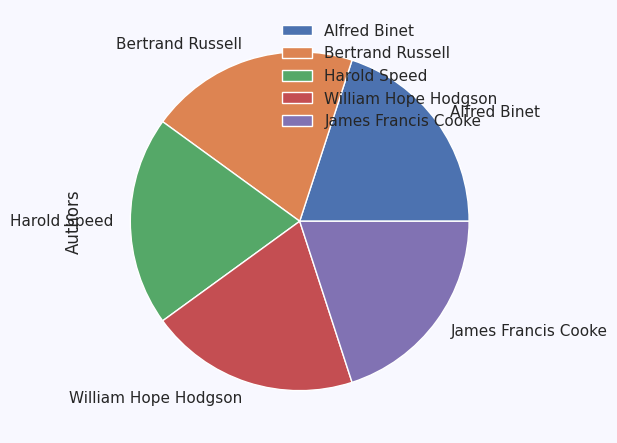

In [332]:
#showing the authors
data['Authors'].value_counts().plot.pie(shadow = False)
plt.legend()
plt.show()

In [220]:
stop_words = list(set(stopwords.words('english')))
print(stop_words)

["don't", 'such', "mightn't", 'do', 'after', 'himself', 'yourself', 'him', 'hadn', 'it', 'will', "mustn't", 'mustn', 'its', 'couldn', 'does', 'while', 'they', 'herself', 'both', 'you', "weren't", 'has', 'until', 'yourselves', "you've", 'why', 'now', 'against', 'been', "couldn't", 'mightn', 'her', 'are', 'not', 'don', "shan't", 'itself', "hasn't", 'having', 'wasn', 'won', 'once', "isn't", 'was', "wasn't", 'wouldn', 'further', 'doing', 'am', "you'd", 'up', 'more', 'by', 'nor', 'again', 'here', 'your', 'she', 'off', 'most', "didn't", 'to', 'ma', 'y', 'those', 'very', 'can', 'shan', 'down', "should've", 'i', 'any', 'needn', 'only', 'but', 'his', 'them', 'weren', 'if', 'when', 'just', 's', 'he', 'that', 'because', 'my', 'myself', 'we', 'over', 'out', 'ain', 'before', 'same', 'from', 't', 'below', 'then', 'is', 'isn', 'there', 'didn', 'few', 'me', 'who', 'so', 'an', "shouldn't", 'a', 'in', 'other', 'during', 'll', "doesn't", 'what', 'their', 'all', 'being', 'with', 've', 'ours', "you'll", 'r

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [221]:
def clean_text(text):
    # Remove HTML tags/markups
    text = re.compile('<.*?>').sub('', text)

    # Replace punctuation with space
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub(r'\[[0-9]*\]',' ',text) #[0-9] matches any digit (0 to 10000...)


    # Remove digits
    text = re.sub(r'\d', ' ', text)

    # Remove non-word characters
    text = re.sub(r'[^\w\s]', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text)

    return text.strip()

# Example usage on a DataFrame column called 'text_column'
data['partitions'] = data['partitions'].apply(clean_text)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [222]:
#remove stopwords
print("\nremove stopwords\n")
def remove_stopwords_from_text(text):
    return remove_stopwords(text)
text=remove_stopwords_from_text(str(data))
print(text)
#lemm words
print("\n stemmed text\n")
lemmatizer = WordNetLemmatizer()
def lemm(data):
    a=[lemmatizer.lemmatize(i) for i in word_tokenize(data) ]
    return ' '.join(a)
text=lemm(str(data))
print(text)


remove stopwords

index Authors label \ 0 0 Alfred Binet 1 0 Alfred Binet 2 0 Alfred Binet 3 0 Alfred Binet 4 0 Alfred Binet .. ... ... ... 195 4 James Francis Cooke e 196 4 James Francis Cooke e 197 4 James Francis Cooke e 198 4 James Francis Cooke e 199 4 James Francis Cooke e partitions length 0 long sort theoretical reason for... 842 1 group independent cons... 867 2 absolute assertions hasty chapter ... 899 3 different antithetical terms w... 879 4 activity encephalic arres... 869 .. ... ... 195 gone like gossamer shining mornin... 771 196 bach structure close compact tha... 809 197 subject brain o... 866 198 new emotional impressions visible evidence... 911 199 work better men throu... 889 [1000 rows x 5 columns]

 stemmed text

index Authors label \ 0 0 Alfred Binet a 1 0 Alfred Binet a 2 0 Alfred Binet a 3 0 Alfred Binet a 4 0 Alfred Binet a .. ... ... ... 195 4 James Francis Cooke e 196 4 James Francis Cooke e 197 4 James Francis Cooke e 198 4 James Francis Cooke e 199 4 Jame

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [223]:
#num of words before cleaning
data['partitions'].apply(lambda x: len(x.split(' '))).sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


149802

In [224]:
#final preprocessing function
def finalpreprocess(data):
    dd=lemm(remove_stopwords_from_text(clean_text(data)))
    return str(dd)

data['clean_text'] = data['partitions'].apply(lambda x: finalpreprocess(x))

#data=data.drop(columns=['length'])
data.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,index,Authors,label,partitions,length,clean_text
0,0,Alfred Binet,a,long can see no sort of theoretical reason for...,842,long sort theoretical reason subordinating con...
1,0,Alfred Binet,a,group and they are just as independent of cons...,867,group independent consciousness object conclus...
2,0,Alfred Binet,a,towards absolute assertions and hasty chapter ...,899,absolute assertion hasty chapter vii definitio...
3,0,Alfred Binet,a,most different and antithetical terms of the w...,879,different antithetical term hypothesis advance...
4,0,Alfred Binet,a,by any the activity of the encephalic by arres...,869,activity encephalic arresting circulation bloo...


In [225]:
#num of words after cleaning
data['clean_text'].apply(lambda x: len(x.split(' '))).sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


55011

In [226]:
data.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1000, 6)

In [227]:
#data.drop_duplicates(inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: title={'center': 'Top 30 words'}, xlabel='word'>

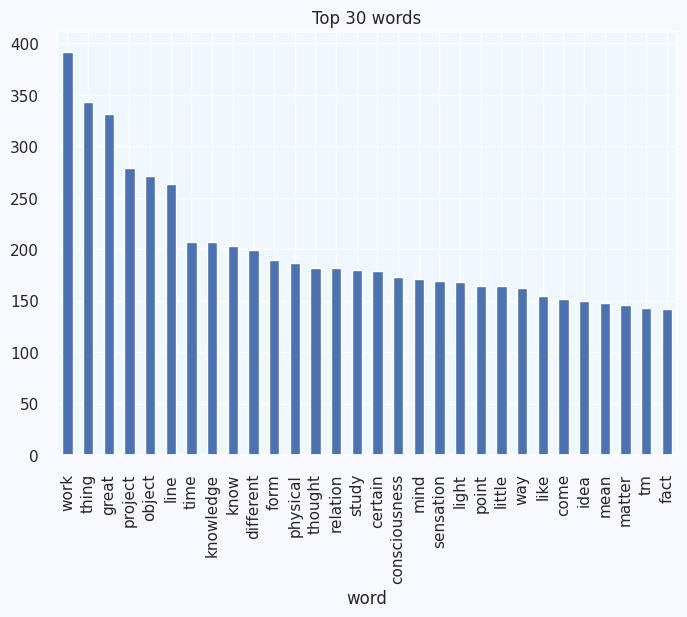

In [333]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(1,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)

    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(data['clean_text'], 30)
df1 = pd.DataFrame(common_words, columns = ['word' , 'count'])
df1.groupby('word').sum()['count'].sort_values(ascending=False).plot(kind='bar', title='Top 30 words')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)



 The most frequent 50 words of book a



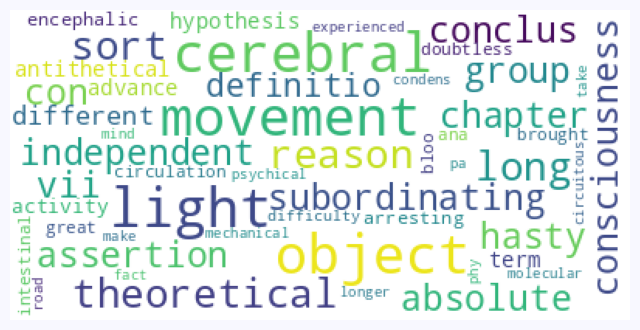


 The most frequent 50 words of book b



/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


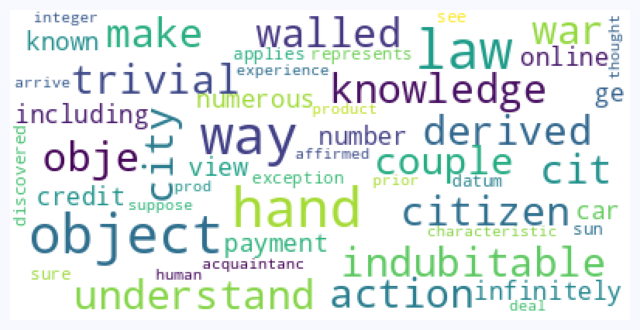


 The most frequent 50 words of book c



/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


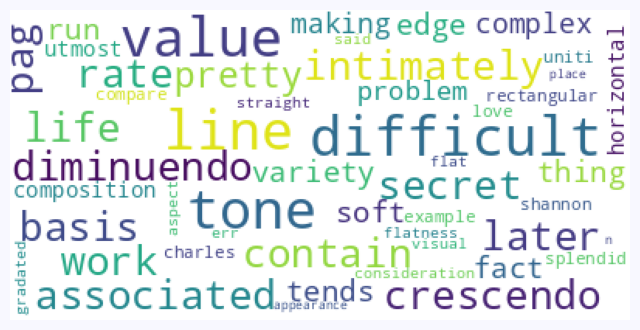


 The most frequent 50 words of book d



/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


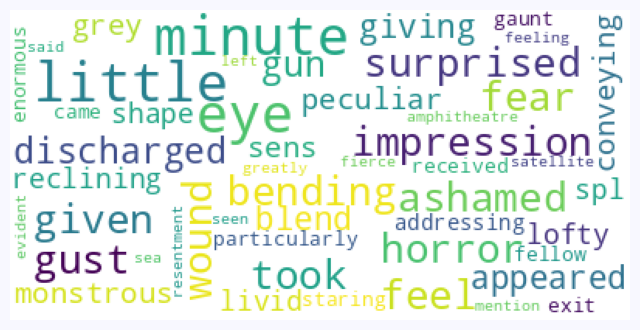


 The most frequent 50 words of book e



/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


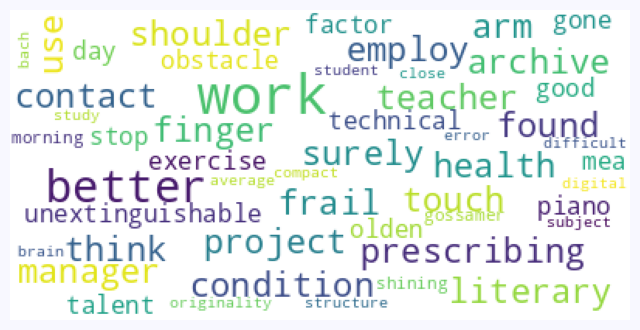

In [229]:
for label in data['label'].unique():
  books = data[data["label"]==label]["clean_text"]

 # wordcloud
  print(f"\n The most frequent 50 words of book {label}\n")
  wc = wordcloud.WordCloud(background_color='white', max_words=50,
                          max_font_size=35)
  wc = wc.generate(str(books))
  plt.axis('off')
  plt.imshow(wc, cmap=None)
  plt.show()

#Text Transformation

##1-Bag of Words

In [230]:

count_Vec= CountVectorizer()
bow = count_Vec.fit_transform(data['clean_text'])
X_bow = bow.toarray()
bow = pd.DataFrame(bow.toarray(), columns=count_Vec.get_feature_names_out())
bow

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,abandon,abandoned,abide,ability,able,abler,ably,abode,abominable,abominably,...,yowl,zeal,zeisler,zest,zinc,zip,zoologist,âme,æsthetic,île
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [231]:
# method to reduce dimension of data to visualize it
tsna_bow = TSNE(n_components= 2, random_state= 42)
data_tsna_bow = tsna_bow.fit_transform(bow)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##2- TFIDF

In [232]:

vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(data['clean_text'])
X_tfidf = tfidf.toarray()
tfidf = pd.DataFrame(tfidf.toarray(), columns=vectorizer.get_feature_names_out())
tfidf

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,abandon,abandoned,abide,ability,able,abler,ably,abode,abominable,abominably,...,yowl,zeal,zeisler,zest,zinc,zip,zoologist,âme,æsthetic,île
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.104459,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [297]:
# method to reduce dimension of data to visualize it
tsna_tfidf = TSNE(n_components= 2, random_state= 42)
data_tsna_tfidf = tsna_tfidf.fit_transform(tfidf)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#3-word Emdedding

In [334]:
# split our partitions to list of words
data_list = data['clean_text'].tolist()
splitted_data = [sen.split() for sen in data_list]
print(len(splitted_data))

1000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [335]:
print(splitted_data[0])

['long', 'sort', 'theoretical', 'reason', 'subordinating', 'consciousness', 'direction', 'nerve', 'supposing', 'consciousness', 'aroused', 'current', 'follow', 'centrifugal', 'point', 'matter', 'hypothesis', 'fairly', 'explain', 'motor', 'current', 'remains', 'explains', 'affair', 'taking', 'consideration', 'nature', 'current', 'current', 'motor', 'born', 'central', 'discharge', 'entirely', 'nervous', 'correspond', 'perception', 'varying', 'carry', 'monotonous', 'course', 'débris', 'sensory', 'flow', 'kind', 'hypothesis', 'supply', 'reason', 'given', 'sensory', 'current', 'according']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [336]:
# build our word2vec model
word_2_vec_model = Word2Vec(splitted_data,
                            min_count= 1,
                            vector_size= 150,
                            workers=6,
                            window= 3,
                            sg= 1)
# save trained model
word_2_vec_model.save("word2vec.model")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [337]:

features = []
for tokens in splitted_data:
  zero_vector = np.zeros(word_2_vec_model.vector_size)
  vectors = []
  for token in tokens:
    if token in word_2_vec_model.wv:
      try:
        vectors.append(word_2_vec_model.wv[token])
      except KeyError:
        continue
  if vectors:
    vectors = np.asarray(vectors)
    avg_vec = vectors.mean(axis=0)
    features.append(avg_vec)
  else:
    features.append(zero_vector)

wordembedd_data = np.array(features)
len(features), len(features[0])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1000, 150)

In [338]:
wordembedd_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[ 0.01616087, -0.02734403, -0.08584455, ..., -0.20755015,
         0.30607295, -0.08892008],
       [ 0.01816637, -0.03619191, -0.07534584, ..., -0.17884457,
         0.2767987 , -0.076189  ],
       [ 0.01927219, -0.03588778, -0.0907426 , ..., -0.213437  ,
         0.32237068, -0.09280246],
       ...,
       [ 0.01033995, -0.02027393, -0.08482826, ..., -0.19241542,
         0.27492875, -0.0866494 ],
       [ 0.01204538, -0.01888673, -0.07616018, ..., -0.17263824,
         0.24918495, -0.08021179],
       [ 0.01253327, -0.02133771, -0.0787267 , ..., -0.17332353,
         0.24556148, -0.0838021 ]], dtype=float32)

In [239]:
print(features[0])

[ 0.00345032 -0.02914716 -0.0868472  -0.05332666 -0.01162937 -0.10677917
 -0.03144266  0.16882072 -0.0347053   0.09620028  0.03826471 -0.05753569
 -0.12120233  0.22616379 -0.1990191  -0.06002746  0.02023057 -0.03080552
  0.0602229   0.22205466 -0.10047714 -0.04761073  0.14606306  0.0361363
  0.07652707 -0.01681803 -0.17241296 -0.21065618 -0.14901124 -0.15767519
  0.02438871  0.10014693 -0.16075704 -0.05693222 -0.08196983  0.03805017
  0.2218902   0.05918648  0.11948892 -0.12702647 -0.15435204 -0.0149244
 -0.1278585  -0.11150432  0.17836301 -0.00425444 -0.0080742  -0.13999069
  0.05580545  0.05670146 -0.13403484  0.08126286 -0.12184199 -0.02999284
 -0.03799284  0.064702    0.04532792  0.05790107  0.1129369  -0.03635576
 -0.04220564 -0.15193541 -0.01344984  0.0082286   0.03783855 -0.12803942
 -0.1016873  -0.2632548  -0.2539841  -0.19245164  0.1176887  -0.00689969
  0.07604236 -0.23705432 -0.08616193 -0.01179449 -0.12624218  0.05674215
 -0.07801472  0.23168057  0.05874675 -0.22279954 -0.0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [298]:
# method to reduce dimension of data to visualize it
tsna_WE = TSNE(n_components= 2, random_state= 42)
data_tsna_WE = tsna_WE.fit_transform(wordembedd_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#4-LDA

In [241]:
# create dictionary
dictionary = corpora.Dictionary(data['clean_text'].str.split())
#Term document frequency
corpus = [dictionary.doc2bow(text) for text in data['clean_text'].str.split()]

# 50 Topic
lda_cor = gensim.models.ldamodel.LdaModel(corpus,
                                           id2word = dictionary,
                                           num_topics = 5,
                                           random_state = 100,
                                           update_every = 1,
                                           chunksize = 100,
                                           passes = 10,
                                           alpha = 'auto',
                                           per_word_topics = True)
lda = lda_cor.inference(corpus)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [242]:
# method to reduce dimension of data to visualize it
tsna_lda = TSNE(n_components= 2, random_state= 42)
data_tsna_lda = tsna_lda.fit_transform(lda[0])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [243]:
lda

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(array([[ 0.3061621 , 52.40919   ,  0.17042144,  0.37237132,  0.3988697 ],
        [ 0.30410352, 21.776588  ,  1.1722051 ,  0.3767261 , 25.79334   ],
        [ 0.32617188, 20.584993  ,  0.1710989 ,  3.236462  , 30.313894  ],
        ...,
        [ 5.440875  ,  4.3864293 ,  1.3204408 , 44.25719   ,  7.2542825 ],
        [ 0.31220007, 37.573677  ,  3.2531223 , 15.201469  , 11.315026  ],
        [ 3.3138955 , 13.626376  ,  2.2993238 , 49.93076   ,  0.4706092 ]],
       dtype=float32),
 None)

In [244]:
!pip install pyLDAvis


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [245]:

lda_df = pd.DataFrame(list(lda[0]), columns=['1', '2','3','4', '5'])
lda_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,1,2,3,4,5
0,0.306162,52.409191,0.170421,0.372371,0.398870
1,0.304104,21.776588,1.172205,0.376726,25.793341
2,0.326172,20.584993,0.171099,3.236462,30.313894
3,25.294598,20.697062,1.301256,4.792736,0.471486
4,0.307677,56.382648,0.170899,0.390110,0.398636


#LDA_2


In [246]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import matplotlib.pyplot as plt
import gensim

paragraphs = data['clean_text'].to_list()
docs = []

for sen in paragraphs:
    docs.append(list(sen.split()))
print(len(docs))

# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)

# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.8)

# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in docs]
print(len(corpus[2]))
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

1000
30
Number of unique tokens: 517
Number of documents: 1000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [247]:
# Set training parameters.
num_topics = 5
chunksize = 1000
passes = 20
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token
#print(len(dictionary))
model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
     )

top_topics = model.top_topics(corpus) #, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Average topic coherence: -2.1839.


In [248]:
all_topics = model.get_document_topics(corpus)
num_docs = len(all_topics)

all_topics_csr = gensim.matutils.corpus2csc(all_topics)
lda_to_cluster = all_topics_csr.T.toarray()
lda_to_cluster.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1000, 5)

#Visualization

In [250]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
#"ch:s=-.2,r=.6"

def visualize_tSNE(matrix, target_column, names):
    # Perform t-SNE dimensionality reduction
    tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000)
    tsne_results = tsne.fit_transform(matrix)


    # Create a scatter plot using seaborn
    sns.set(rc={ 'axes.facecolor':'aliceblue', 'figure.facecolor':'ghostwhite'})
    sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=target_column, palette="viridis")
    for i, name in enumerate(names):
        plt.text(tsne_results[i, 0], tsne_results[i, 1], name, fontsize=8, ha='center')


    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.title('t-SNE Visualization of ' +names)
    plt.legend(title='Target')



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.006s...
[t-SNE] Computed neighbors for 1000 samples in 0.622s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.931120
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.433975
[t-SNE] KL divergence after 1000 iterations: 1.344254


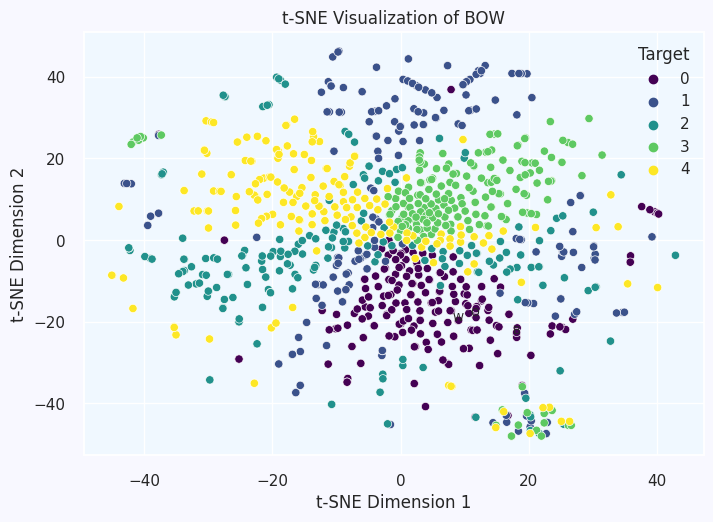

In [251]:
visualize_tSNE(X_bow ,data['index'],'BOW')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.016s...
[t-SNE] Computed neighbors for 1000 samples in 1.266s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.343626
[t-SNE] KL divergence after 50 iterations with early exaggeration: 64.192802
[t-SNE] KL divergence after 1000 iterations: 1.031458


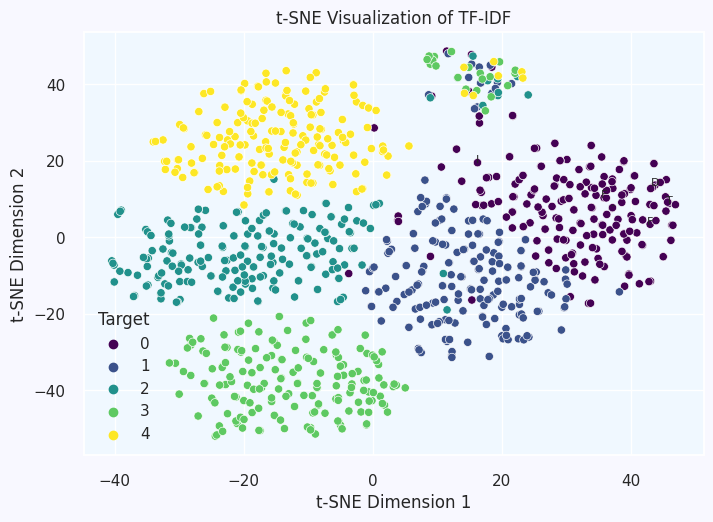

In [252]:
visualize_tSNE(X_tfidf ,data['index'],'TF-IDF')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.071s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.027609
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.738647
[t-SNE] KL divergence after 1000 iterations: 0.434736


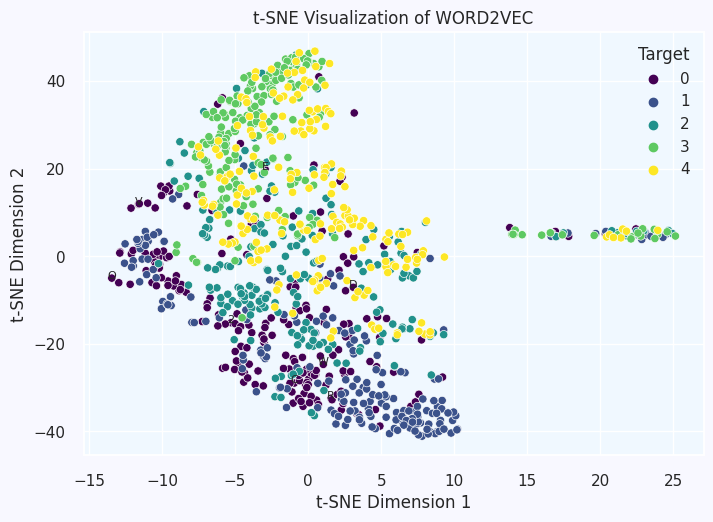

In [253]:
visualize_tSNE(wordembedd_data ,data['index'],'WORD2VEC')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.034s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.000745
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.350212
[t-SNE] KL divergence after 1000 iterations: 0.151070


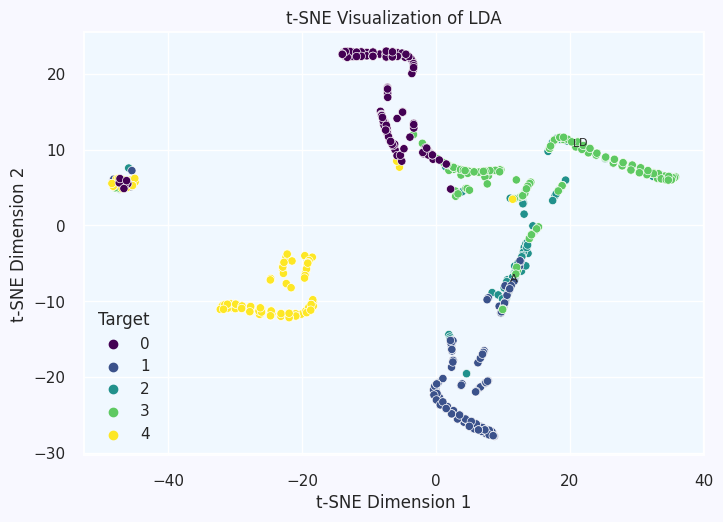

In [290]:
visualize_tSNE(lda_to_cluster ,data['index'],'LDA')

# Models


# 1-KMeans

##1.1-K-means With BOW

In [324]:
kmeans_bow= KMeans(n_clusters= 5, init='k-means++', random_state=0)
label_kmean_bow = kmeans_bow.fit_predict(bow)
label_kmean_bow

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

##1.2-K-Means with TFIDF

In [325]:
kmeans_tfidf= KMeans(n_clusters= 5, init='k-means++', random_state=0)
label_kmean_tfidf = kmeans_tfidf.fit_predict(tfidf)
label_kmean_tfidf

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 2, 0, 0, 0, 4, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

##1.3-K-Means with Word-Embedding









In [326]:
kmeans_w2v= KMeans(n_clusters= 5, init='k-means++', random_state=0)
label_kmean_WE = kmeans_w2v.fit_predict(wordembedd_data)
label_kmean_WE

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 0, 1, 0, 0, 0, 3, 1, 1, 0, 1, 3, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 3, 3, 1, 0, 0, 0, 0, 4, 1, 1, 3, 1, 0, 1, 0, 0, 3, 1, 0,
       1, 0, 3, 0, 1, 0, 0, 0, 1, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 3, 3, 0, 4, 1, 0, 1, 0, 1, 0, 1, 0, 3, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 3, 0, 0, 4, 1, 3, 0, 1, 1, 3, 1, 0, 0, 2, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 3, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 3, 1, 1, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 2, 1, 3, 0, 1, 0, 1, 0, 0, 0, 1, 0, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 4, 1, 1, 1, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 2, 0, 1, 1, 0, 3, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 2, 1, 3, 4, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 4, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,

##1.4-K-Means with LDA


In [327]:
kmeans_lda= KMeans(n_clusters= 5, init='k-means++', random_state=0)
label_kmean_LDA= kmeans_lda.fit_predict(data_tsna_lda)
label_kmean_LDA

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 4, 4, 3, 1, 4, 4, 1, 4, 1, 1, 3, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 4, 3, 4, 1, 4, 3, 1, 1, 3, 2, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 4, 3, 1, 1, 4, 0, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 3,
       1, 1, 3, 1, 1, 1, 1, 2, 4, 1, 4, 1, 1, 0, 1, 1, 1, 2, 4, 1, 1, 3,
       1, 1, 4, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 4, 4, 3,
       4, 1, 1, 1, 3, 1, 4, 3, 4, 4, 3, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 3,
       3, 1, 4, 1, 1, 1, 2, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 2, 4, 1, 3,
       3, 1, 1, 4, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 4, 0, 4, 2, 4, 4, 4, 2, 1, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 1, 1, 4, 4, 4, 3, 4, 4, 2, 4, 4, 4, 4, 4, 4,
       4, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 1, 4, 4, 2, 4, 4, 2, 4, 1, 3, 4,
       1, 4, 4, 3, 4, 2, 1, 4, 1, 4, 4, 4, 4, 4, 3, 4, 4, 2, 4, 4, 4, 4,
       3, 4, 4, 1, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4,

#2- Expectation Maximization (EM)

#2.1-EM with Bag of words




In [260]:

num_clusters = 5  # Number of clusters/components
gmm_bow = GaussianMixture(n_components=num_clusters ,
                             covariance_type= "spherical" ,
                            n_init= 10 )
#gmm_bow.fit(bow)
# Step 2: fit and predict labels
labels_EM_bow = gmm_bow.fit_predict(bow)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [261]:
labels_EM_bow

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 3, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 3, 3, 2, 1, 2, 2, 0, 1, 1, 2, 4, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 4, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2,
       2, 2, 2, 2, 3, 4, 2, 2, 3, 4, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2,
       2, 2, 2, 3, 3, 2, 2, 2, 2, 1, 2, 2, 2, 3, 3, 4, 3, 1, 3, 2, 2, 3,
       3, 3, 3, 2, 2, 2, 1, 1, 3, 2, 0, 2, 2, 3, 4, 2, 2, 3, 2, 3, 2, 3,
       2, 2, 1, 2, 2, 4, 2, 2, 3, 3, 1, 2, 2, 2, 2, 2, 3, 4, 2, 2, 2, 2,
       3, 2, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 1,

##2.2- EM with TFIDF

In [262]:
num_clusters = 5  # Number of clusters/components
gmm_tfidf = GaussianMixture(n_components=num_clusters ,
                             covariance_type= "spherical" ,
                            n_init= 10 )
# Step 2: fit and predict labels
labels_EM_tfidf = gmm_tfidf.fit_predict(tfidf)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##2.3-EM with Word-Embedding


In [263]:
num_clusters = 5  # Number of clusters/components
gmm_WE = GaussianMixture(n_components=num_clusters ,
                             covariance_type= "spherical" ,
                            n_init= 10 )
# Step 2: fit and predict labels
labels_EM_WE = gmm_WE.fit_predict(wordembedd_data)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [264]:
labels_EM_tfidf

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#2.4-EM with LDA


In [265]:
num_clusters = 5  # Number of clusters/components
gmm_WE = GaussianMixture(n_components=num_clusters ,
                             covariance_type= "spherical" ,
                            n_init= 10 )
# Step 2: fit and predict labels
labels_EM_LDA = gmm_WE.fit_predict(data_tsna_lda)
labels_EM_LDA




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([4, 1, 1, 4, 4, 1, 1, 4, 1, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 2, 1, 4, 1, 4, 4, 4, 4, 3, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 1, 4, 4, 4, 1, 0, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4,
       4, 4, 2, 4, 4, 4, 4, 3, 4, 4, 1, 4, 4, 0, 4, 4, 4, 3, 1, 4, 4, 4,
       4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4,
       1, 4, 4, 4, 4, 4, 4, 4, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       2, 4, 1, 4, 4, 4, 3, 1, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 3, 1, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 1, 0, 1, 3, 1, 1, 1, 3, 4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 4, 1, 1,
       1, 4, 4, 1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 3, 1, 1, 3, 1, 4, 4, 1,
       4, 1, 1, 4, 1, 3, 4, 1, 4, 1, 1, 1, 1, 1, 4, 1, 1, 3, 1, 1, 1, 1,
       4, 1, 1, 4, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

#3- Hierarchical clustering (Agglomerative)

##3.1- Hierarchical clustering With BOW




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


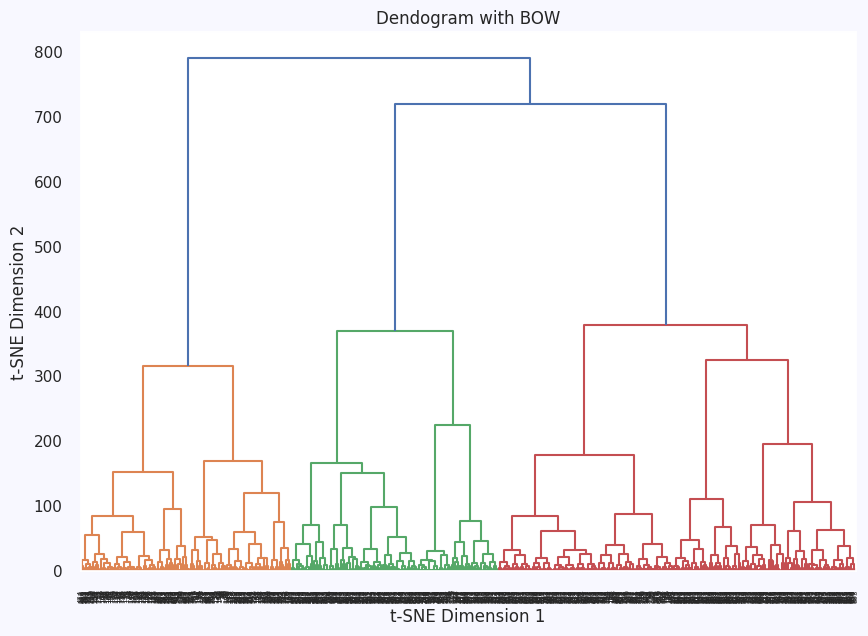

In [306]:
plt.figure(figsize=(10, 7))
plt.title("Dendogram with BOW")
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

dend_bow= shc.dendrogram(shc.linkage(data_tsna_bow, method='ward'))

agg_bow= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
labels_HC_bow= agg_bow.fit_predict(data_tsna_bow)



##3.2- Hierarchical clustering With tfidf

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


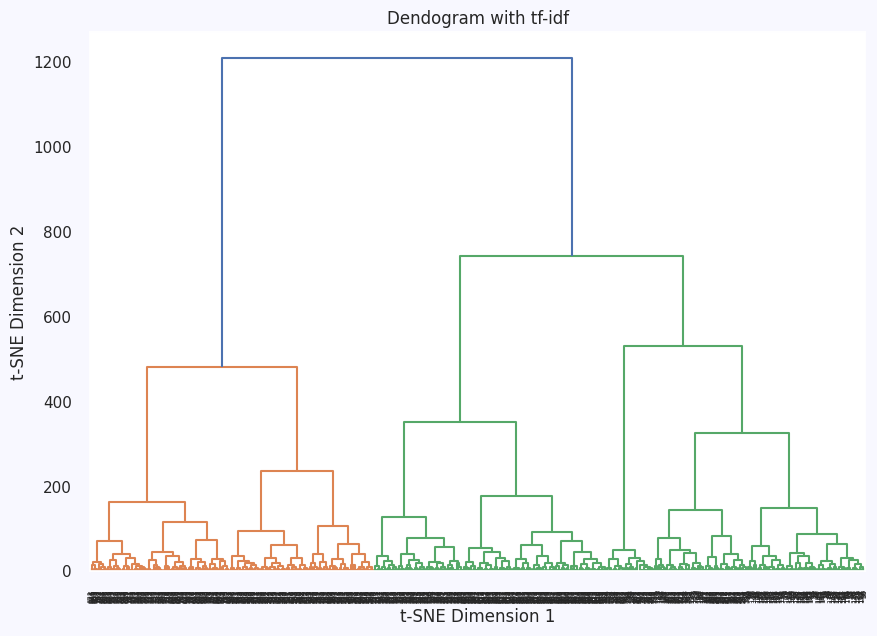

In [307]:
plt.figure(figsize=(10, 7))
plt.title("Dendogram with tf-idf")
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

dend_tfidf= shc.dendrogram(shc.linkage(data_tsna_tfidf, method='ward'))
agg_tfidf= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
labels_HC_tfidf= agg_tfidf.fit_predict(data_tsna_tfidf)

##3.3- Hierarchical clustering With word emdedding

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


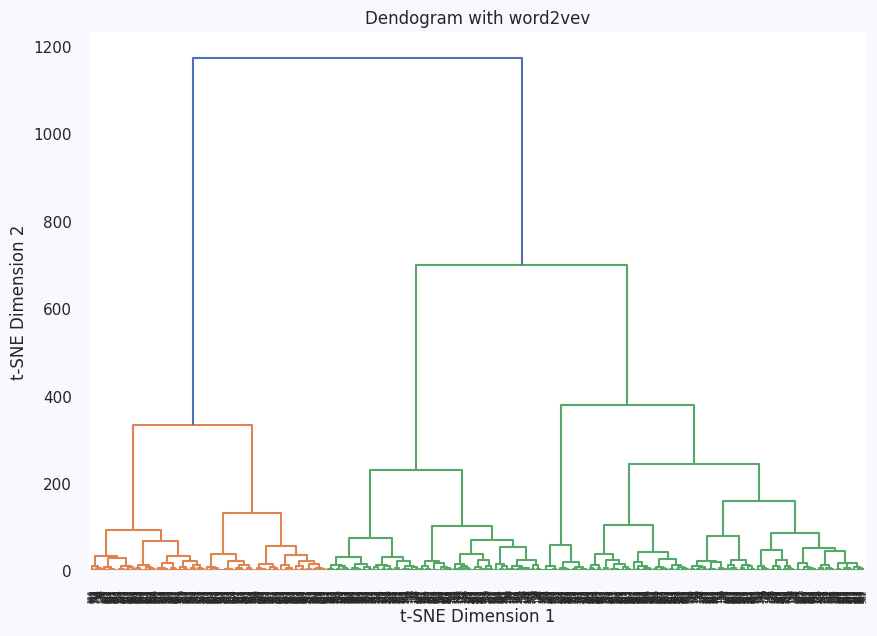

In [308]:
plt.figure(figsize=(10, 7))
plt.title("Dendogram with word2vev")
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

dend_WE= shc.dendrogram(shc.linkage(data_tsna_WE, method='ward'))
agg_WE= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
labels_HC_WE= agg_WE.fit_predict(data_tsna_WE)

##3.4- Hierarchical clustering With LDA


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


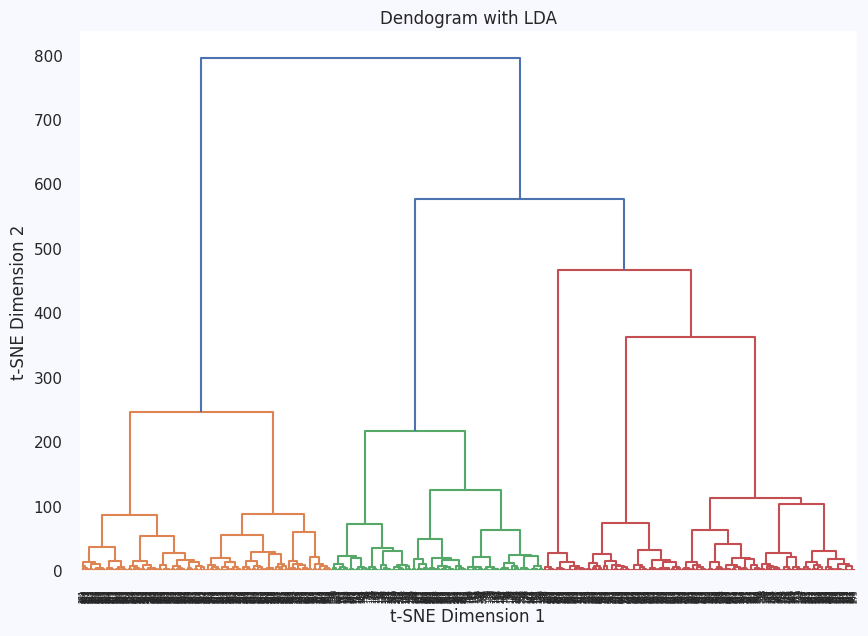

In [309]:
plt.figure(figsize=(10, 7))
plt.title("Dendogram with LDA")
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

dend_WE= shc.dendrogram(shc.linkage(data_tsna_lda, method='ward'))
agg_WE= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
labels_HC_LDA= agg_WE.fit_predict(data_tsna_lda)



In [270]:
#from sklearn.metrics import silhouette_score
#silhoutte_av=silhouette_score(bow_df,labels)
#print("the avg sillhouette_score is ",silhoutte_av)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [271]:
#from sklearn.decomposition import PCA
#pca=PCA(n_components=2)
#pca.fit(bow_df)
#df=pca.transform(bow_df)
#df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [272]:
#kmeans = KMeans(n_clusters=5)

# Fit the KMeans model to the bag-of-words data
#kmeans.fit(df)

# Predict the cluster labels for each data point
#labels = kmeans.predict(df)

# Print the cluster labels
#print(labels)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [273]:
#from sklearn.metrics import silhouette_score
#silhoutte_av=silhouette_score(df,labels)
#print("the avg sillhouette_score is ",silhoutte_av)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Evaluation

# KAPPA

In [274]:
from collections import Counter
from collections import defaultdict
from sklearn.metrics import cohen_kappa_score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [275]:
def mapping_Kappa(Y_Actual,Y_Predict):
  start = 0
  Count_Labels_list=[]
  Dict1 = defaultdict(list)
  list1=[]
  max=0
  c=-1
  Final_Dict={}
  Mapping_Dict={}

  for i in range(5):
      end = start + 200
      part = Y_Predict[start:end]
      Count_Labels_list.append(Counter(part))
      start = end


  i = 0
  for Dict in Count_Labels_list:
      for key in Dict:
          if i == 0:
              Dict1[key].append(Dict[key])
          else:
              if key in Dict1:
                  Dict1[key].append(Dict[key])
              else:
                  Dict1[key].append(Dict[key])
      i = 1


  for d in Dict1:
    count=-1
    c=-1
    max=0
    #print(d)
    values = Dict1.get(d, set())
    for value in values:
        count+=1
        if value>max:
          if count in list1:
            continue
          else:
            max=value
            c=count
    Final_Dict[d] = max
    list1.append(c)
  Final_Dict = dict(sorted(Final_Dict.items(), key=lambda item: item[1], reverse=True))


  list3=[]
  for Dict in Count_Labels_list:
      for key in Final_Dict:
        #print(Dict.values())
        if Final_Dict[key] in Dict.values():
          for D in Dict:
            if D==key and Final_Dict[key]==Dict[D] and key not in list3:
                  key1 = f'Mapping Actual Class {i} to {Dict}'
                  Mapping_Dict[key1] = key
                  list3.append(key)
                  #print(j+1)
      i+=1



  Actual_Label_Mapping = Y_Actual.values
  j=200
  n=0
  z=0
  for Dict in Mapping_Dict:
    if z!=0:
      n=int(j-200)
    else:
      n=0
      z=1
    for i in range(200):
      Actual_Label_Mapping[n]=Mapping_Dict[Dict]
      n+=1
    #n=int(j/200)
    j=j+200

  return  Count_Labels_list,Dict1,Final_Dict,Mapping_Dict,Actual_Label_Mapping

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [276]:
Count_Labels_list,Dict1,Final_Dict,Mapping_Dict,Actual_Label_Mapping=mapping_Kappa(df_books["index"],label_kmean_bow)

Count_Labels_list

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[Counter({0: 196, 2: 3, 4: 1}),
 Counter({0: 184, 2: 12, 1: 1, 3: 1, 4: 2}),
 Counter({0: 127, 4: 17, 1: 45, 2: 8, 3: 3}),
 Counter({3: 181, 0: 7, 2: 12}),
 Counter({4: 186, 2: 7, 0: 6, 3: 1})]

In [277]:
Dict1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


defaultdict(list,
            {0: [196, 184, 127, 7, 6],
             2: [3, 12, 8, 12, 7],
             4: [1, 2, 17, 186],
             1: [1, 45],
             3: [1, 3, 181, 1]})

In [278]:
Final_Dict

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{0: 196, 4: 186, 3: 181, 2: 12, 1: 0}

In [279]:

Mapping_Dict

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'Mapping Actual Class 1 to Counter({0: 196, 2: 3, 4: 1})': 0,
 'Mapping Actual Class 2 to Counter({0: 184, 2: 12, 4: 2, 1: 1, 3: 1})': 2,
 'Mapping Actual Class 4 to Counter({3: 181, 2: 12, 0: 7})': 3,
 'Mapping Actual Class 5 to Counter({4: 186, 2: 7, 0: 6, 3: 1})': 4}

In [280]:
Actual_Label_Mapping

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

**KAPPA With K-Means**

In [281]:

print("Score Before Handling Kappa of K-means With BOW           :  {:.4f}".format(cohen_kappa_score(df_books["index"],label_kmean_bow.tolist())))
print("Score Before Handling Kappa of K-means With TFIDF         :  {:.4f}".format(cohen_kappa_score(df_books["index"],label_kmean_tfidf)))
print("Score Before Handling Kappa of K-means With Word Embedding      :  {:.4f}".format(cohen_kappa_score(df_books["index"],label_kmean_WE)))
print("Score Before Handling Kappa of K-means With LDA      :  {:.4f}".format(cohen_kappa_score(df_books["index"],label_kmean_LDA)))

Score Before Handling Kappa of K-means With BOW           :  0.2148
Score Before Handling Kappa of K-means With TFIDF         :  0.0547
Score Before Handling Kappa of K-means With Word Embedding      :  -0.0050
Score Before Handling Kappa of K-means With LDA      :  -0.1559


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [282]:
Count_Labels_list,Dict1,Final_Dict,Mapping_Dict,Actual_Label_Mapping=mapping_Kappa(df_books["index"],label_kmean_bow)
print("Kappa Score of K-means With BOW           :  {:.4f}".format(cohen_kappa_score(Actual_Label_Mapping.tolist(),label_kmean_bow)))
Count_Labels_list,Dict1,Final_Dict,Mapping_Dict,Actual_Label_Mapping=mapping_Kappa(df_books["index"],label_kmean_tfidf)
print("Kappa Score of K-means With TFIDF         :  {:.4f}".format(cohen_kappa_score(Actual_Label_Mapping.tolist(),label_kmean_tfidf)))
Count_Labels_list,Dict1,Final_Dict,Mapping_Dict,Actual_Label_Mapping=mapping_Kappa(df_books["index"],label_kmean_WE)
print("Kappa Score of K-means With Word Embedding      :  {:.4f}".format(cohen_kappa_score(Actual_Label_Mapping,label_kmean_WE)))
Count_Labels_list,Dict1,Final_Dict,Mapping_Dict,Actual_Label_Mapping=mapping_Kappa(df_books["index"],label_kmean_LDA)
print("Kappa Score of K-means With LDA      :  {:.4f}".format(cohen_kappa_score(Actual_Label_Mapping,label_kmean_LDA)))


Kappa Score of K-means With BOW           :  0.2148
Kappa Score of K-means With TFIDF         :  0.0937
Kappa Score of K-means With Word Embedding      :  0.2738
Kappa Score of K-means With LDA      :  0.4975


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**KAPPA with EM**

In [283]:
print("Score Before Handling Kappa of EM With BOW           :  {:.4f}".format(cohen_kappa_score(df_books["index"].tolist(),labels_EM_bow)))
print("Score Before Handling Kappa of EM With TFIDF         :  {:.4f}".format(cohen_kappa_score(df_books["index"].tolist(),labels_EM_tfidf)))
print("Score Before Handling Kappa of EM With Word Embedding      :  {:.4f}".format(cohen_kappa_score(df_books["index"].tolist(),labels_EM_WE)))
print("Score Before Handling Kappa of EM With LDA      :  {:.4f}".format(cohen_kappa_score(df_books["index"].tolist(),labels_EM_LDA)))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Score Before Handling Kappa of EM With BOW           :  0.0387
Score Before Handling Kappa of EM With TFIDF         :  -0.2337
Score Before Handling Kappa of EM With Word Embedding      :  -0.1150
Score Before Handling Kappa of EM With LDA      :  0.0837


In [284]:
Count_Labels_list,Dict1,Final_Dict,Mapping_Dict,Actual_Label_Mapping=mapping_Kappa(df_books["index"],labels_EM_bow)
print("Kappa Score of EM With BOW           :  {:.4f}".format(cohen_kappa_score(Actual_Label_Mapping.tolist(),labels_EM_bow)))
Count_Labels_list,Dict1,Final_Dict,Mapping_Dict,Actual_Label_Mapping=mapping_Kappa(df_books["index"],labels_EM_tfidf)
print("Kappa Score of EM With TFIDF         :  {:.4f}".format(cohen_kappa_score(Actual_Label_Mapping.tolist(),labels_EM_tfidf)))
Count_Labels_list,Dict1,Final_Dict,Mapping_Dict,Actual_Label_Mapping=mapping_Kappa(df_books["index"],labels_EM_WE)
print("Kappa Score of EM With Word Embedding      :  {:.4f}".format(cohen_kappa_score(Actual_Label_Mapping.tolist(),labels_EM_WE.tolist())))
Count_Labels_list,Dict1,Final_Dict,Mapping_Dict,Actual_Label_Mapping=mapping_Kappa(df_books["index"],labels_EM_LDA)
print("Kappa Score of EM With LDA      :  {:.4f}".format(cohen_kappa_score(Actual_Label_Mapping.tolist(),labels_EM_LDA.tolist())))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Kappa Score of EM With BOW           :  0.5337
Kappa Score of EM With TFIDF         :  -0.0693
Kappa Score of EM With Word Embedding      :  0.1663
Kappa Score of EM With LDA      :  0.5162


**KAPPA with Hierarchical clustering**

In [285]:
print("Score Before Handling Kappa of Hierarchical clustering With BOW           :  {:.4f}".format(cohen_kappa_score(df_books["index"].tolist(),labels_HC_bow)))
print("Score Before Handling Kappa of Hierarchical clustering With TFIDF         :  {:.4f}".format(cohen_kappa_score(df_books["index"].tolist(),labels_HC_tfidf )))
print("Score Before Handling Kappa of Hierarchical clustering With Word Embedding      :  {:.4f}".format(cohen_kappa_score(df_books["index"].tolist(),labels_HC_WE)))
print("Score Before Handling Kappa of Hierarchical clustering With LDA      :  {:.4f}".format(cohen_kappa_score(df_books["index"].tolist(),labels_HC_LDA)))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Score Before Handling Kappa of Hierarchical clustering With BOW           :  0.0863
Score Before Handling Kappa of Hierarchical clustering With TFIDF         :  0.0863
Score Before Handling Kappa of Hierarchical clustering With Word Embedding      :  0.0863
Score Before Handling Kappa of Hierarchical clustering With LDA      :  0.1875


In [286]:
Count_Labels_list,Dict1,Final_Dict,Mapping_Dict,Actual_Label_Mapping=mapping_Kappa(df_books["index"],labels_HC_bow)
print("Kappa Score of Hierarchical clustering With BOW           :  {:.4f}".format(cohen_kappa_score(Actual_Label_Mapping.tolist(),labels_HC_bow)))
Count_Labels_list,Dict1,Final_Dict,Mapping_Dict,Actual_Label_Mapping=mapping_Kappa(df_books["index"],labels_HC_tfidf)
print("Kappa Score of Hierarchical clustering With TFIDF         :  {:.4f}".format(cohen_kappa_score(Actual_Label_Mapping.tolist(),labels_HC_tfidf)))
Count_Labels_list,Dict1,Final_Dict,Mapping_Dict,Actual_Label_Mapping=mapping_Kappa(df_books["index"],labels_HC_WE)
print("Kappa Score of Hierarchical clustering With Word Embedding      :  {:.4f}".format(cohen_kappa_score(Actual_Label_Mapping.tolist(),labels_HC_WE.tolist())))
Count_Labels_list,Dict1,Final_Dict,Mapping_Dict,Actual_Label_Mapping=mapping_Kappa(df_books["index"],labels_HC_LDA)
print("Kappa Score of Hierarchical clustering With LDA      :  {:.4f}".format(cohen_kappa_score(Actual_Label_Mapping.tolist(),labels_HC_LDA)))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Kappa Score of Hierarchical clustering With BOW           :  0.3750
Kappa Score of Hierarchical clustering With TFIDF         :  0.3750
Kappa Score of Hierarchical clustering With Word Embedding      :  0.3750
Kappa Score of Hierarchical clustering With LDA      :  0.5112


# (2) Silhouette

In [294]:
def visualize_silhouette_kmeans(X_data, model, title):
  # Instantiate the clustering model and visualizer
  visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
  # Fit the data to the visualizer
  visualizer.fit(X_data)
  plt.xlabel('t-SNE Dimension 1')
  plt.ylabel('t-SNE Dimension 2')
  plt.title("Silhouette Score of K-means With " + title)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(2.1) Silhouette with K-means

In [295]:
print("Silhouette Score of K-means With BOW      :  {:.4f}".format(silhouette_score(bow, label_kmean_bow)))
print("Silhouette Score of K-means With TFIDF    :  {:.4f}".format(silhouette_score(tfidf, label_kmean_tfidf)))
print("Silhouette Score of K-means With Word2Vec :  {:.4f}".format(silhouette_score(wordembedd_data, label_kmean_WE)))
print("Silhouette Score of K-means With LDA      :  {:.4f}".format(silhouette_score(data_tsna_lda, label_kmean_LDA)))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Silhouette Score of K-means With BOW      :  -0.0094
Silhouette Score of K-means With TFIDF    :  0.0220
Silhouette Score of K-means With Word2Vec :  0.4400
Silhouette Score of K-means With LDA      :  0.5605


**(2.2) Silhouette with EM**

In [315]:
#bow labels_EM_bow  tfidf  labels_EM_tfidf  wordembedd_data  labels_EM_WE  data_tsna_lda  labels_EM_LDA
print("Silhouette Score of EM With BOW      :  {:.4f}".format(silhouette_score(bow, labels_EM_bow)))
print("Silhouette Score of EM With TFIDF    :  {:.4f}".format(silhouette_score(tfidf, labels_EM_tfidf)))
print("Silhouette Score of EM With Word2Vec :  {:.4f}".format(silhouette_score(wordembedd_data, labels_EM_WE)))
print("Silhouette Score of EM With LDA      :  {:.4f}".format(silhouette_score(data_tsna_lda, labels_EM_LDA)))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Silhouette Score of EM With BOW      :  -0.0172
Silhouette Score of EM With TFIDF    :  0.0209
Silhouette Score of EM With Word2Vec :  0.3732
Silhouette Score of EM With LDA      :  0.5487


**(2.3) Silhouette with Hierarchical clustering**

In [316]:
print("Silhouette Score of Hierarchical clustering With BOW      :  {:.4f}".format(silhouette_score(data_tsna_bow, labels_HC_bow)))
print("Silhouette Score of Hierarchical clustering With TFIDF    :  {:.4f}".format(silhouette_score(data_tsna_tfidf, labels_HC_tfidf)))
print("Silhouette Score of Hierarchical clustering With Word2Vec :  {:.4f}".format(silhouette_score(data_tsna_WE, labels_HC_WE)))
print("Silhouette Score of Hierarchical clustering With LDA      :  {:.4f}".format(silhouette_score(data_tsna_lda, labels_HC_LDA)))

Silhouette Score of Hierarchical clustering With BOW      :  0.2718
Silhouette Score of Hierarchical clustering With TFIDF    :  0.4345
Silhouette Score of Hierarchical clustering With Word2Vec :  0.4743
Silhouette Score of Hierarchical clustering With LDA      :  0.5555


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Cohenrence of LDA

In [311]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import matplotlib.pyplot as plt
import gensim

paragraphs = data['clean_text'].to_list()
docs = []

for sen in paragraphs:
    docs.append(list(sen.split()))
print(len(docs))

# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)

# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.8)

# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in docs]
print(len(corpus[2]))
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1000
30
Number of unique tokens: 517
Number of documents: 1000


In [312]:
# Set training parameters.
num_topics = 5
chunksize = 1000
passes = 20
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token
#print(len(dictionary))
model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
     )

top_topics = model.top_topics(corpus) #, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Average topic coherence: -3.4550.


In [313]:
# Compute Perplexity
# a measure of how good the model is. lower the better.
print('\nPerplexity score: ', model.log_perplexity(corpus))

cm_cv = CoherenceModel(model= model, texts= splitted_data, dictionary=dictionary, coherence='c_v')
cm_umass = CoherenceModel(model= model, texts= splitted_data, dictionary=dictionary, coherence='u_mass')
coherence_cv = round(cm_cv.get_coherence(), 4)  # get coherence value
coherence_umass = round(cm_umass.get_coherence(), 4)  # get coherence value
print("\nCoherence score With LDA using c_v: {}".format(coherence_cv))
print("\nCoherence score With LDA using u_mass: {}".format(coherence_umass))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity score:  -5.707611654064349

Coherence score With LDA using c_v: 0.4942

Coherence score With LDA using u_mass: -3.455


# Error-Analysis


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import pyLDAvis
import pyLDAvis.gensim_models as genisvis
import gensim

# Convert the corpus to a list of lists of strings
corpus = [[str(word) for word in doc] for doc in corpus]

# Create the dictionary object
dict_obj = gensim.corpora.Dictionary(corpus)

# Convert the corpus to a bag of words representation
bow_corpus = [dict_obj.doc2bow(doc) for doc in corpus]

# Train the LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=bow_corpus,
                                            id2word=dict_obj,
                                            num_topics=5)

# Transform the corpus into the topic space
lda_corpus = lda_model[bow_corpus]

# Convert the corpus to a 2D numpy array
X = gensim.matutils.corpus2dense(lda_corpus, num_terms=lda_model.num_topics).T

# Calculate the silhouette scores for different numbers of clusters
range_n_clusters = range(2, 11)
sil_scores = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    sil_scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

# Plot the silhouette scores
plt.plot(range_n_clusters, sil_scores)
plt.title("Selecting number of clusters based on silhouette scores")
plt.xlabel("K")
plt.ylabel("Silhouette score")
plt.show()


In [ ]:
# Create  analysis data frame
def analysis_data (features_eng_results , data):
  analysis_df = data[['clean_text', 'label' , "index" ]]
  analysis_df['cluster_output'] = pd.DataFrame(features_eng_results.astype(str))
  return analysis_df

In [ ]:
# count the number of matches between most frequent words in clusters and true labels
from collections import Counter

def most_frequent_words(num_words ,df_name , label_column , docu_column):
  genres = []
  for label in df_name[label_column].unique():
    genre = df_name[df_name[label_column]==label][docu_column]
    genres.append(genre)

  clusters_label= []
  for cls in range(len(genres)):
    lab = []
    for doc in genres[cls]:
      text = ""
      text += doc
      text += " "
      lab.append(text)
    clusters_label.append(lab)

  clusters_content = []
  for i in range(len(clusters_label)):
    whole_texts = ""
    for j in range(len(clusters_label[i])):
      whole_texts += clusters_label[i][j]
      whole_texts += " "
    clusters_content.append(whole_texts)

  most_frequent_words = []
  most_frequent_words_weights = []

  for ele in range(len(clusters_content)):
    word_list =[]
    weights_list = []
    string = clusters_content[ele]
    split_it = string.split()                # Pass the split_it list to instance of Counter class.
    Count = Counter(split_it)              # most_common() produces k frequently encountered input values and their respective counts.
    most_occur = Count.most_common(num_words)
    for tup in range(len(most_occur)):
      fw =  most_occur[tup][0]
      weights = most_occur[tup][1]
      word_list.append(fw)
      weights_list.append(weights)

    most_frequent_words.append(word_list)
    most_frequent_words_weights.append(weights_list)

  return most_frequent_words , most_frequent_words_weights

In [ ]:
# Create  disctionary of matches
def matches_dict(labels_mf , clusters_label_mf):
  lab_cls_match = {}
  for i in range(len(labels_mf)):
    scores_i = []
    for j in range(len(clusters_mf)):
      matches = len(set(labels_mf[i]) & set(clusters_mf[j]))
      scores_i.append(matches)
    lab_cls_match[i] = scores_i
  return lab_cls_match

In [ ]:
# Create  disctionary of matches_weights
def weights_dict(labels_mf , clusters_label_mf ,clusters_mfw ):
  lab_cls_match_weights = {}
  for i in range(len(labels_mf)):
    scores_i = []
    for j in range(len(clusters_mfw)):
      matches = len(set(labels_mf[i]) & set(clusters_mf[j]))
      weight = sum(clusters_mfw[j][0:matches])
      scores_i.append(weight)
    lab_cls_match_weights[i] = scores_i
  return lab_cls_match_weights

In [ ]:
#show list most frequent words and there weights
def most_frequent_words_weights(lbl_list , wgt_list):
  list_most_frequent_words_weights = []
  for i  in range(len(lbl_list)):
    lis = []
    for f, b in zip(lbl_list[i], wgt_list[i]):
      element = [f ,b]
      ele= tuple(element)
      lis.append(ele)
    list_most_frequent_words_weights.append(lis)
  return list_most_frequent_words_weights

In [ ]:
analysis_df = analysis_data(label_kmean_LDA , data)
analysis_df

In [ ]:
labels_mf , labels_mfw  = most_frequent_words (25,
                                               analysis_df,
                                               "index",
                                               "clean_text")

clusters_mf,clusters_mfw = most_frequent_words( 25,
                                               analysis_df,
                                               "cluster_output",
                                               "clean_text")

lab_cls_match = matches_dict(labels_mf , clusters_mf)
lab_cls_match

In [ ]:
lab_cls_weights = weights_dict(labels_mf ,
                               clusters_mf ,
                               clusters_mfw)
lab_cls_weights

In [ ]:
frequent_elements_labels = most_frequent_words_weights(labels_mf,labels_mfw)
print("\n Frequent words with its occurancies through the aactual class (label) \n")
print("most frequent words in label : 0  \n ", frequent_elements_labels[0] ,"\n")
print("most frequent words in label : 1  \n ", frequent_elements_labels[1] ,"\n")
print("most frequent words in label : 2  \n ", frequent_elements_labels[2] ,"\n")
print("most frequent words in label : 3  \n ", frequent_elements_labels[3] ,"\n")
print("most frequent words in label : 4  \n ", frequent_elements_labels[4] ,"\n")

In [ ]:
frequent_elements_weights = most_frequent_words_weights(clusters_mf,clusters_mfw)
print("\n Frequent words with its occurancies through the aactual cluster (output) \n")
print("most frequent words in cluster : 0  \n ", frequent_elements_weights[0] ,"\n")
print("most frequent words in cluster : 1  \n ", frequent_elements_weights[1] ,"\n")
print("most frequent words in cluster : 2  \n ", frequent_elements_weights[2] ,"\n")
print("most frequent words in cluster : 3  \n ", frequent_elements_weights[3] ,"\n")
print("most frequent words in cluster : 4  \n ", frequent_elements_weights[4] ,"\n")